# Lecture 3

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

# An Overview of Pandas GroupBy

This exercise is inspired by Wes McKinney's [Python for Data Analysis](http://proquest.safaribooksonline.com.libproxy.berkeley.edu/book/programming/python/9781491957653).

In [3]:
df = pd.read_csv("elections.csv")
df

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
...,...,...,...,...,...
20,Romney,Republican,47.2,2012,loss
21,Clinton,Democratic,48.2,2016,loss
22,Trump,Republican,46.1,2016,win


In [14]:
df['%'].groupby(df['Party']).first()

Party
Democratic     41.0
Independent     6.6
Republican     50.7
Name: %, dtype: float64

In [28]:
(df['%']
 .groupby([df['Party'], df['Result']])
 .mean()
#  .loc['Democratic']
)

Party        Result
Democratic   loss      44.85
             win       49.05
Independent  loss      11.30
Republican   loss      42.75
             win       51.27
Name: %, dtype: float64

In [41]:
df.groupby('Party').max()

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
...,...,...,...,...,...
20,Romney,Republican,47.2,2012,loss
21,Clinton,Democratic,48.2,2016,loss
22,Trump,Republican,46.1,2016,win


In [55]:
(df
 .groupby(['Party', 'Result'])
 .mean()
 .reset_index()
 .set_index('Party')
)

,Result,%,Year
Party,,,
Democratic,loss,44.85,1995.33
Democratic,win,49.05,2002.00
Independent,loss,11.30,1989.33
Republican,loss,42.75,2002.00
Republican,win,51.27,1995.33


In [60]:
df.pivot_table(
    index='Party',
    columns='Result',
    values='%',
    aggfunc=np.mean,
)

Result,loss,win
Party,,
Democratic,44.85,49.05
Independent,11.30,NaN
Republican,42.75,51.27


## List Arguments to pivot_table (Extra)

## Custom Aggregation Functions

## Using Groups to Filter Datasets

## Using isin as a shorthand for slicing

## Grouping over a different dimension (bonus topic, less often useful)

## Baby Names: Getting the Data

In [61]:
import requests
from pathlib import Path

namesbystate_path = Path('namesbystate.zip')
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'

if not namesbystate_path.exists():
    print('Downloading...', end=' ')
    resp = requests.get(data_url)
    with namesbystate_path.open('wb') as f:
        f.write(resp.content)
    print('Done!')

## What were the most popular California male & female names in each year?

### Extracting from a ZIP archive

We can see how large the compressed and uncompressed data are:

In [62]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')
sum(f.file_size for f in zf.filelist) / 1_000_000

122.38892

In [63]:
sum(f.compress_size for f in zf.filelist) / 1_000_000

21.568281

In [64]:
__/_  # divide the next-previous result by the previous one

5.674486529547719

What are these data?

In [ ]:
zf.extract('StateReadMe.pdf')

We want the names for California.

In [65]:
print([f.filename for f in zf.filelist])

['AK.TXT', 'AL.TXT', 'AR.TXT', 'AZ.TXT', 'CA.TXT', 'CO.TXT', 'CT.TXT', 'DC.TXT', 'DE.TXT', 'FL.TXT', 'GA.TXT', 'HI.TXT', 'IA.TXT', 'ID.TXT', 'IL.TXT', 'IN.TXT', 'KS.TXT', 'KY.TXT', 'LA.TXT', 'MA.TXT', 'MD.TXT', 'ME.TXT', 'MI.TXT', 'MN.TXT', 'MO.TXT', 'MS.TXT', 'MT.TXT', 'NC.TXT', 'ND.TXT', 'NE.TXT', 'NH.TXT', 'NJ.TXT', 'NM.TXT', 'NV.TXT', 'NY.TXT', 'OH.TXT', 'OK.TXT', 'OR.TXT', 'PA.TXT', 'RI.TXT', 'SC.TXT', 'SD.TXT', 'StateReadMe.pdf', 'TN.TXT', 'TX.TXT', 'UT.TXT', 'VA.TXT', 'VT.TXT', 'WA.TXT', 'WI.TXT', 'WV.TXT', 'WY.TXT']


In [66]:
ca_name = 'CA.TXT'
with zf.open(ca_name) as f:
    for i in range(10):
        print(f.readline().rstrip().decode())

CA,F,1910,Mary,295
CA,F,1910,Helen,239
CA,F,1910,Dorothy,220
CA,F,1910,Margaret,163
CA,F,1910,Frances,134
CA,F,1910,Ruth,128
CA,F,1910,Evelyn,126
CA,F,1910,Alice,118
CA,F,1910,Virginia,101
CA,F,1910,Elizabeth,93


In [67]:
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    ca = pd.read_csv(fh, header=None, names=field_names)
ca

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
...,...,...,...,...,...
374631,CA,M,2017,Zia,5
374632,CA,M,2017,Ziad,5
374633,CA,M,2017,Ziv,5


In [68]:
ca.shape

(374634, 5)

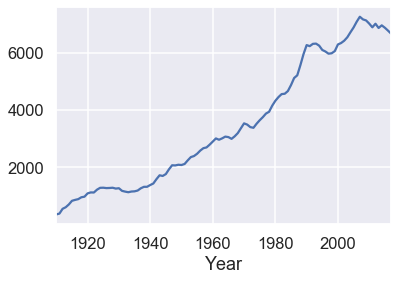

In [73]:
ca.groupby('Year').size().plot()

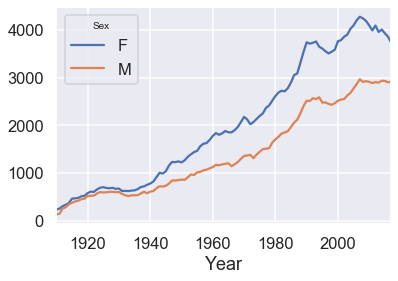

In [89]:
# ca.groupby(['Year', 'Sex']).first()
(ca.pivot_table(index='Year', columns='Sex',
                values='Name',
                aggfunc=len)
 .plot()
)

## Enrollment Practice Questions

In [ ]:
df = pd.read_csv("enrollments.csv", usecols=["Term", "Subject", "Number", "Title", "Enrollment Cnt", "Instructor"])
df.head()

## Challenge One

Try to find all Spring offerings of this course. Note, this dataset only contains Spring offerings, so there's no need to filter based on semester. The official "Number" for this class is "C100".

## Challenge Two

Create a series where each row correspond to one subject (e.g. English), and each value corresponds to the average number of students for courses in that subject. For example, your series might have a row saying that the average number of students in a Computer Science class is 88.

## Challenge Three

Create a multi-indexed series where each row corresponds to one subject (e.g. English) offered during one semester (e.g. Spring 2017), and each value corresponds to the maximum number of students for courses in that subject during that semester. For example, you might have a row saying that the maximum number of students in a computer science course during Spring 2012 was 575.

## Challenge Four

Try to compute the size of the largest class ever taught by each instructor. This challenge is stated more vaguely on purpose. You'll have to decide what the data structure looks like. Your result should be sorted in decreasing order of class size.

## Can I deduce birth sex from the last letter of a person’s name?

In [106]:
last_letter = ca.pivot_table(
    index='Last', columns='Sex',
    values='Count', aggfunc=sum
)
totals = last_letter['F'] + last_letter['M']

,F,M
Last,,
a,9.69e-01,0.03
b,6.02e-03,0.99
c,1.30e-02,0.99
...,...,...
x,4.70e-02,0.95
y,5.65e-01,0.44
z,6.90e-01,0.31


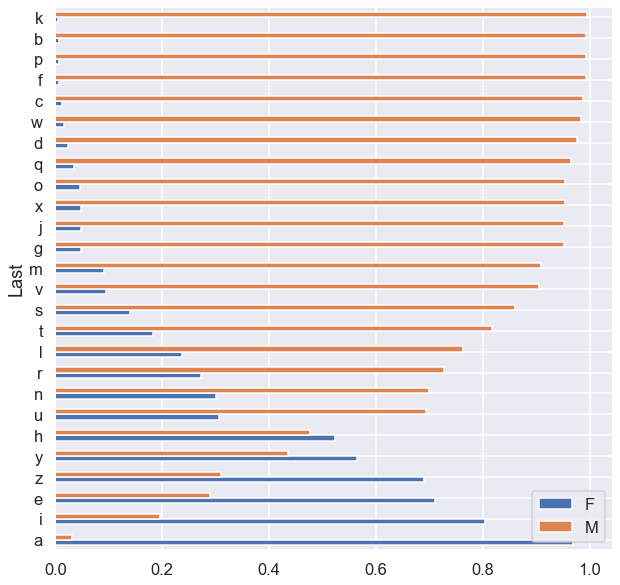

In [109]:
last_props = pd.DataFrame({
    'F': last_letter['F'] / totals,
    'M': last_letter['M'] / totals,
})
last_props.sort_values('M').plot.barh(figsize=(10, 10))

### Visualize our result

In [113]:
df.set_index('Party').reset_index().set_index('%')

,Party,Candidate,Year,Result
%,,,,
50.7,Republican,Reagan,1980,win
41.0,Democratic,Carter,1980,loss
6.6,Independent,Anderson,1980,loss
...,...,...,...,...
47.2,Republican,Romney,2012,loss
48.2,Democratic,Clinton,2016,loss
46.1,Republican,Trump,2016,win
